In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
N = "100"
lie_type = "random"

In [3]:
statuses = {0: "no endpoint blacklisted", 1: "one endpoint blacklisted", 2: "both endpoints blacklisted"}
colors = {"no endpoint blacklisted": "green", 
          "one endpoint blacklisted": "blue", 
          "both endpoints blacklisted": "red"}

In [4]:
data= pd.read_csv("data/percentage/test_"
                  +N+"_nodes_"+lie_type+".csv")[[
    "node_1","node_2","lie_percentage","nb_strikes_1","nb_strikes_2","threshold"]]

threshold = data["threshold"][0]

In [55]:
grouped = pd.DataFrame(data\
    .groupby(["nb_strikes_1", "node_1"])["lie_percentage"]\
    .apply(list)).reset_index()

lies_N = pd.DataFrame(grouped[grouped["node_1"] == "N5"]["lie_percentage"]).reset_index()["lie_percentage"][0]

print(list(pd.DataFrame(lies_N).sort_values(by=0)[0]))

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01, 0.13, 0.18, 0.19, 0.24, 0.51, 0.65, 0.78, 1.12, 1.65, 1.81, 1.91, 1.95, 2.03, 2.06, 2.21, 2.31, 2.38, 2.41, 2.52, 2.63, 2.64, 2.66, 2.67, 2.94, 2.94, 2.97, 3.01, 3.25, 3.46, 3.62, 4.05, 4.1, 4.27, 4.31, 4.34, 4.35, 4.41, 4.65, 4.69, 4.74, 4.92, 5.0, 5.22, 5.36, 5.37, 5.44, 5.63, 5.71, 5.77, 6.25, 6.44, 6.53, 6.81, 6.98, 6.99, 7.3, 7.32, 7.56, 7.66, 7.78, 8.16, 8.86, 8.92, 9.29, 12.37]


In [6]:
nb_strikes = data\
    .groupby(["nb_strikes_1", "node_1"])["lie_percentage"]\
    .apply(list)\
    .reset_index()["nb_strikes_1"]


In [7]:
#data['strike_quartiles'] = pd.qcut(data['nb_strikes_1'], 5)

/home/sabrina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index


<Figure size 432x288 with 0 Axes>

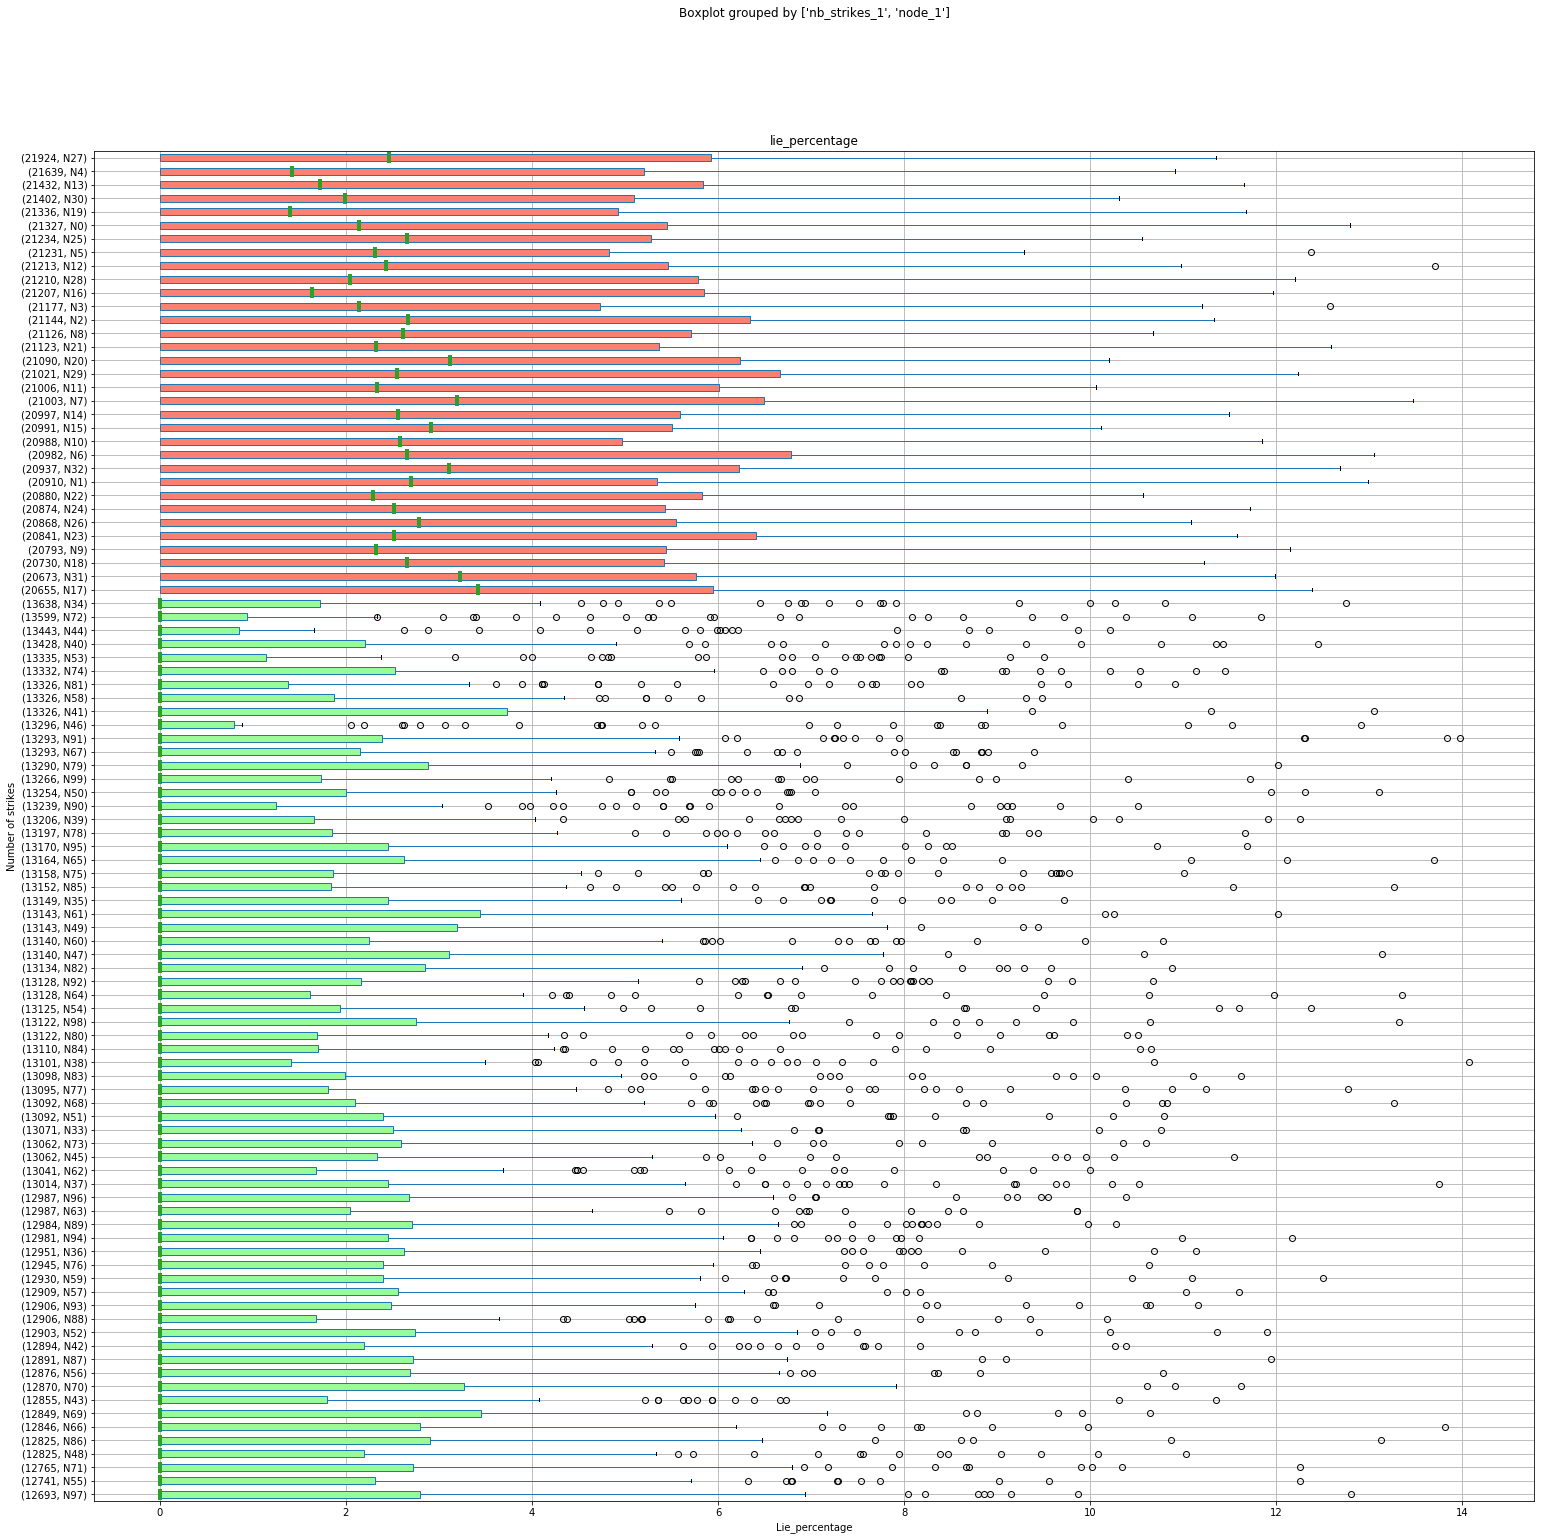

In [8]:
plt.figure()


medianprops = dict(linestyle='-', linewidth=4, color='blue')

bp = pd.DataFrame.boxplot( data,
    column="lie_percentage",
    by=["nb_strikes_1", "node_1"], 
    figsize=(25, 25), 
    vert=False, 
    medianprops=medianprops,
    return_type='both', 
    patch_artist = True)
    
colors = ['salmon', 'palegreen']
for row_key, (ax,row) in bp.iteritems():

    ax.set_xlabel('Lie_percentage')
    ax.set_ylabel('Number of strikes')
    for i,box in enumerate(row['boxes']):
        box.set_facecolor(colors[nb_strikes[i] < threshold ])
        

#ax.set_yticks(np.arange(0, 100, step=500))

In [9]:
fig = ax.get_figure()


In [10]:
fig.savefig('graphs/percentage/'+N+'_nodes_' + lie_type+".png")